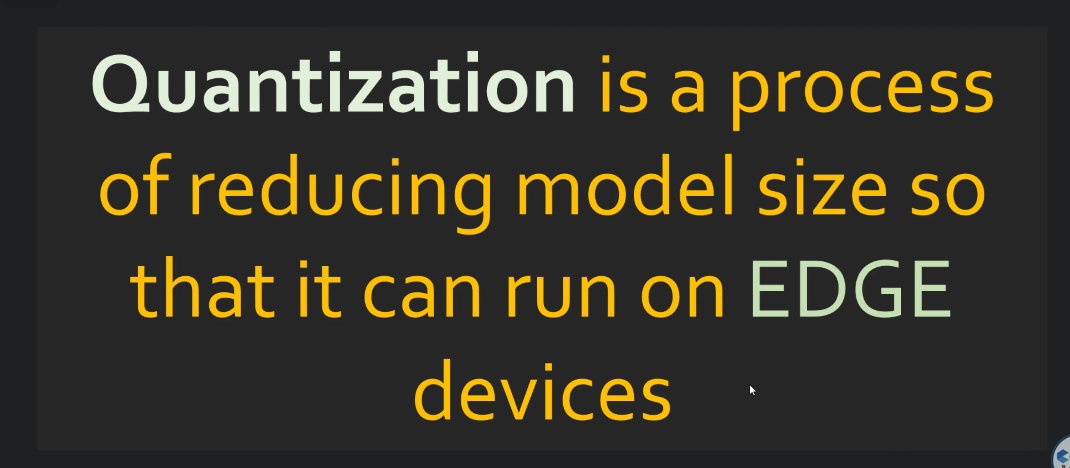

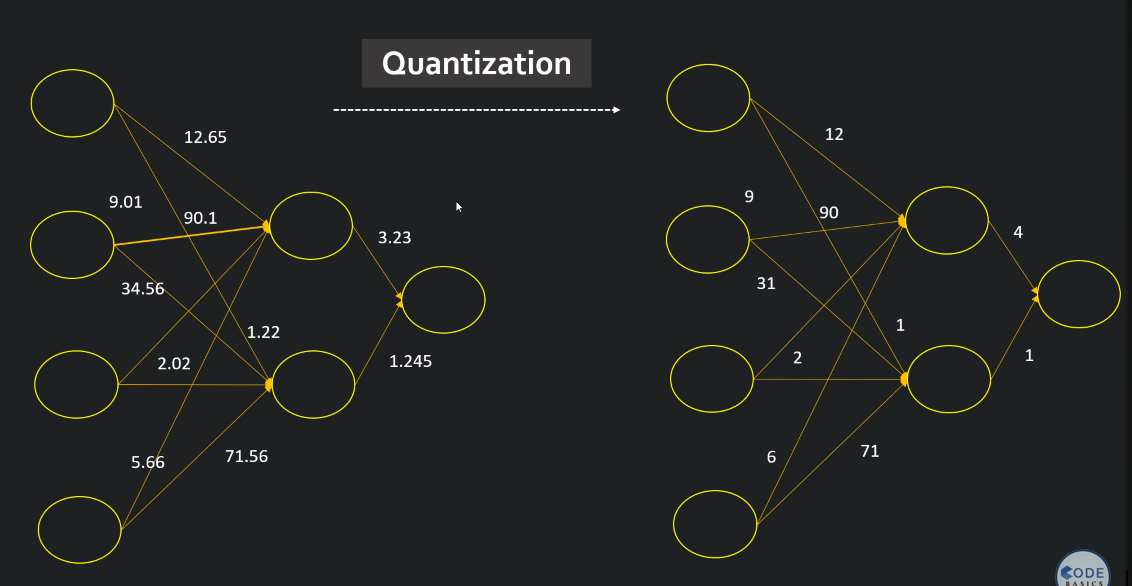

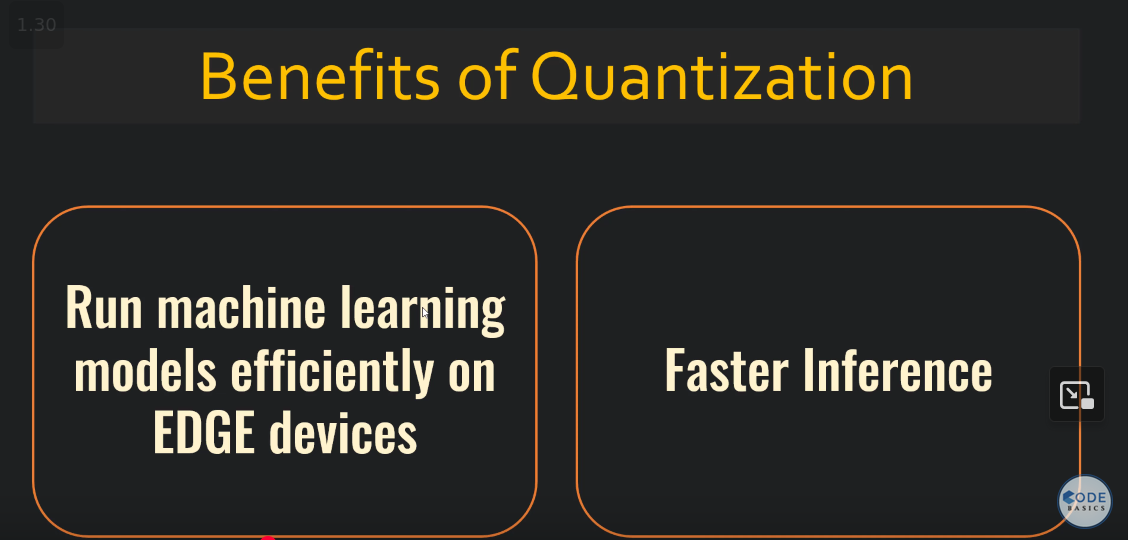

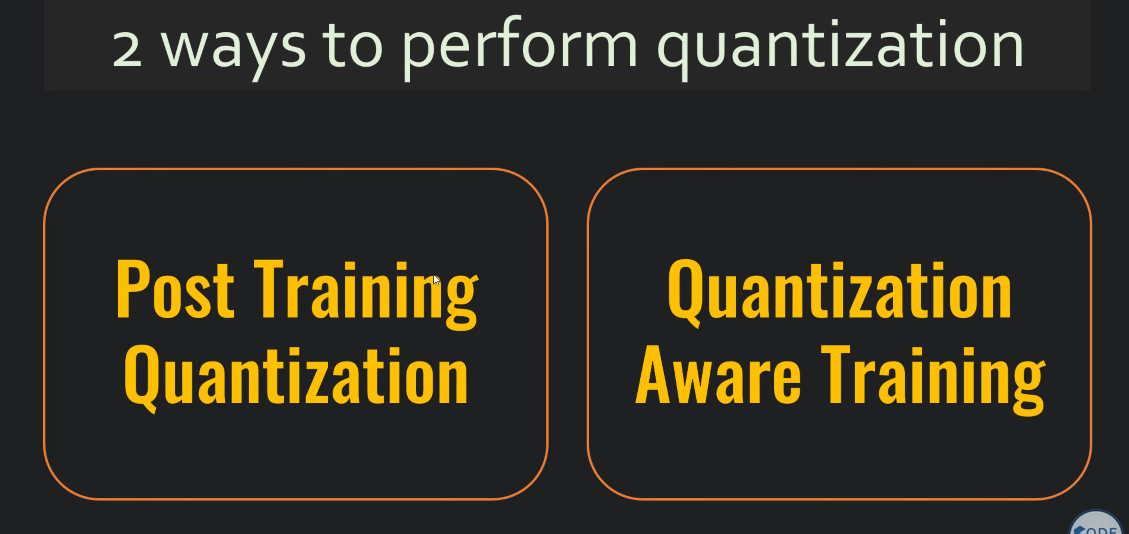

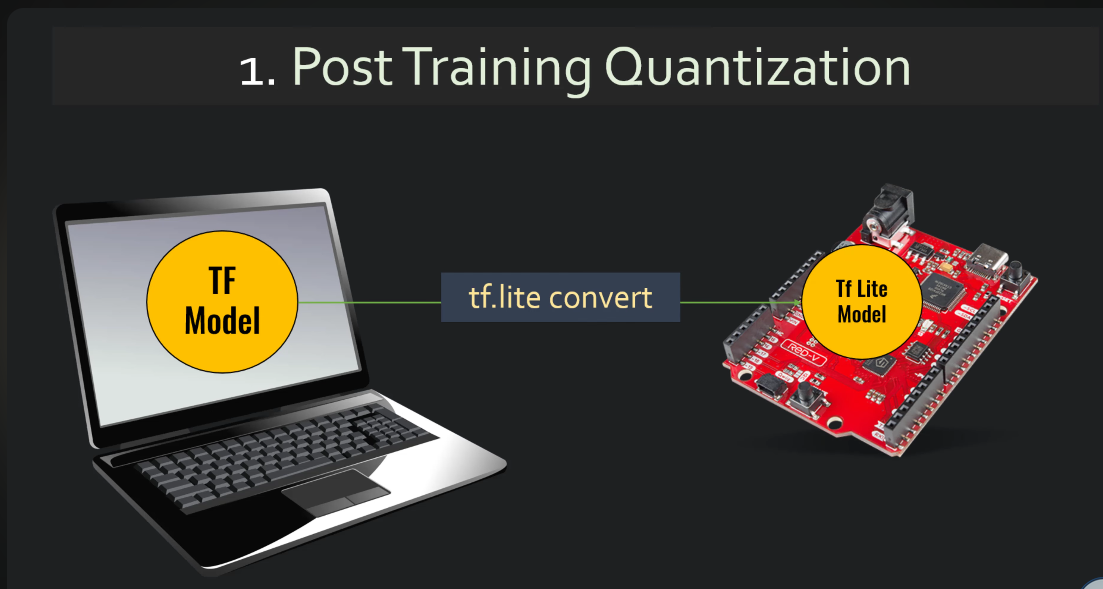

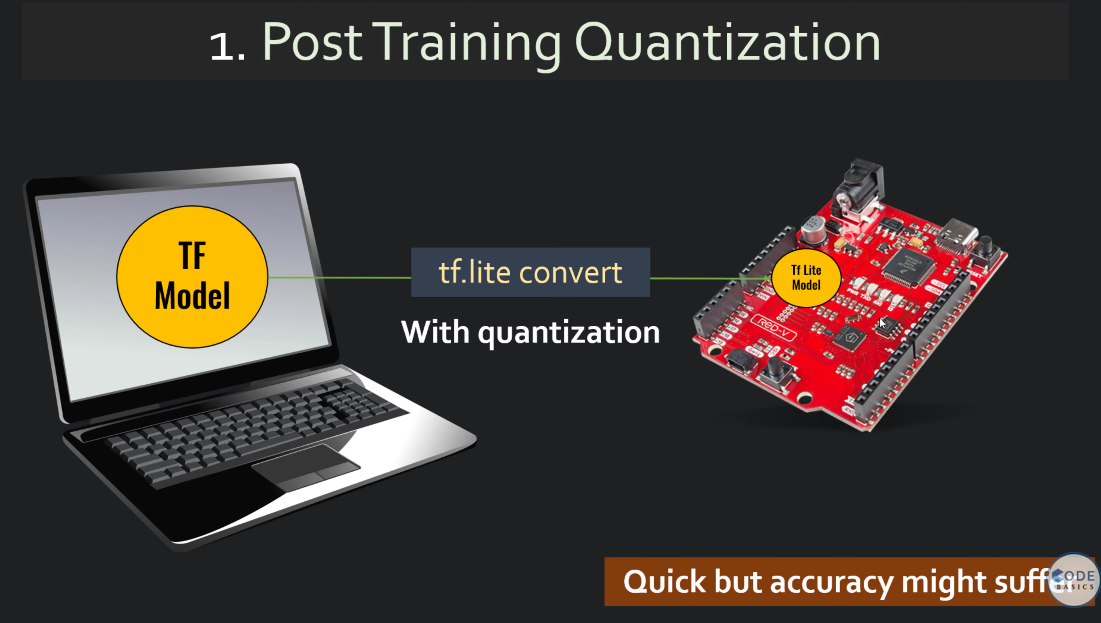

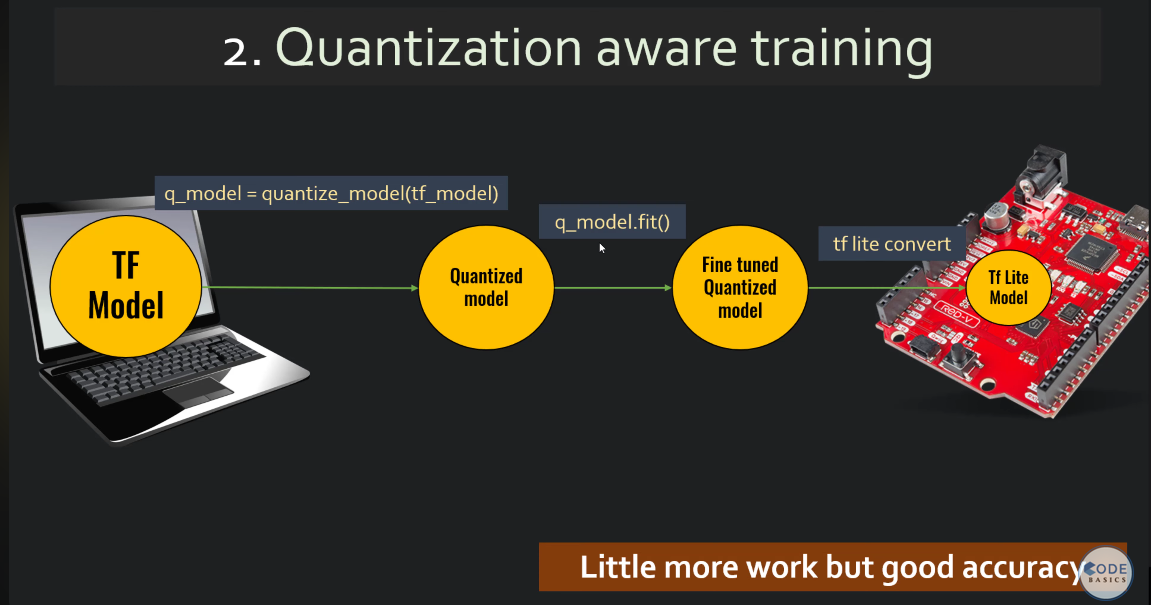

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
X_train_flattened=X_train.reshape(len(X_train),28*28)

In [ ]:
X_test_flattened= X_test.reshape(len(X_test),28*28)

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy']
             )
model.fit(X_train_flattened, y_train, epochs=5)

In [ ]:
model.evaluate(X_test_flattened, y_test)

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
model.export("/content/drive/MyDrive/datasets/saved_model")

# **1 - Post Training Quantization**

In [ ]:
#Without Quantization
converter = tf.lite.TFLiteConverter.from_saved_model("/content/drive/MyDrive/datasets/saved_model")
tflite_model = converter.convert()

In [ ]:
len(tflite_model)

In [ ]:
#With Quantization
converter = tf.lite.TFLiteConverter.from_saved_model("/content/drive/MyDrive/datasets/saved_model")
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model = converter.convert()

In [ ]:
len(tflite_quant_model)

In [ ]:
with open("/content/drive/MyDrive/datasets/tflite_model.tflite","wb") as f:
  f.write(tflite_model)

with open("/content/drive/MyDrive/datasets/tflite_quant_model.tflite","wb") as f:
  f.write(tflite_quant_model)

# **2 - Quantization Aware training**

In [ ]:
# !pip uninstall numpy -y

# !pip uninstall tensorflow-model-optimization -y

# !pip install numpy==1.23.5 tensorflow==2.13 tensorflow-model-optimization==0.8.0



In [ ]:
import tensorflow_model_optimization as tfmot
from tensorflow import keras

# Original model
model = keras.Sequential([
    keras.layers.Input(shape=(784,)),  # more explicit than input_shape in layer
    keras.layers.Dense(10, activation='sigmoid')
])

# Quantization-aware model
quantize_model = tfmot.quantization.keras.quantize_model
q_aware_model = quantize_model(model)

q_aware_model.summary()

In [ ]:
q_aware_model.fit(X_train, y_train, epochs=1)

In [ ]:
q_aware_model.evaluate(X_test, y_test)

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(q_aware_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_qaware_model = converter.convert()

In [ ]:
with open("/content/drive/MyDrive/datasets/tflite_qaware_model.tflite","wb") as f:
  f.write(tflite_qaware_model)